In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso
import pandas as pd
from utils import write_cache, read_cache, get_factor_info, sample
from datasets import NoSplit, RatioSplit, CrossValidation

In [2]:
cache_path = "D:/OneDrive - Singapore Management University/cache/netflix_data_small.pickle"
X, factor_info = read_cache(cache_path)

_, _, X = sample(X, axis=0, n_samples=1000, seed=3080)
display(X.shape)

_, _, X = sample(X, axis=1, n_samples=500, seed=4060)
display(X.shape)

[I] Sampling to size 1000
[I]   Sampling seed    : 3080


(1000, 3362)

[I] Sampling to size 500
[I]   Sampling seed    : 4060


(1000, 500)

### k-fold cross-validation

In [3]:
from datasets import RatioSplit, CrossValidation

In [4]:
# manually select model with ratio split

X_split = RatioSplit(X=X, test_size=0.2, val_size=0.15, seed=1997)
X_split.negative_sample(train_size=X_split.pos_train_size, 
                        val_size=X_split.pos_val_size, 
                        test_size=X_split.pos_test_size, 
                        seed=2023, type='popularity')
X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 4653
[I]   val_size     : 1075
[I]   test_size    : 1433
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 492839
[I]   n_negatives  : 7161
[I]   train_size   : 4653
[I]   val_size     : 1075
[I]   test_size    : 1433
[I]   seed         : 2023


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.8, 0.2]
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.


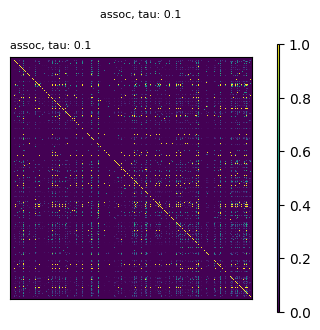

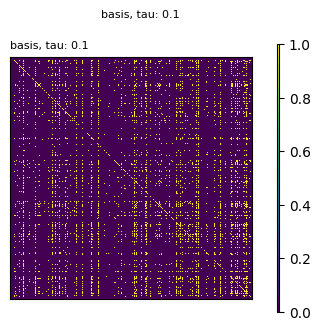

[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.8, 0.2]
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.


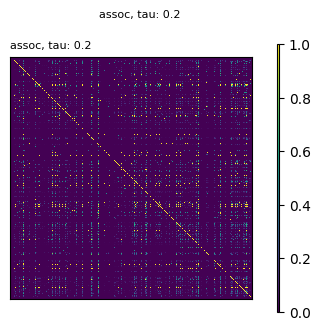

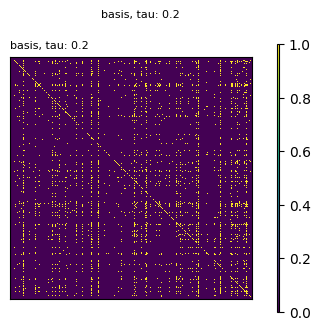

[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.8, 0.2]
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.


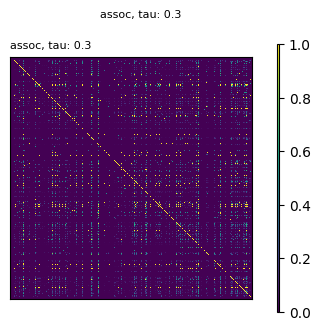

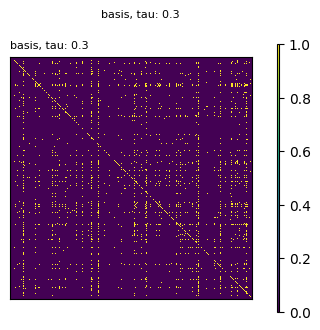

[I] k            : 5
[I] tau          : 0.4
[I] weights      : [0.8, 0.2]
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.


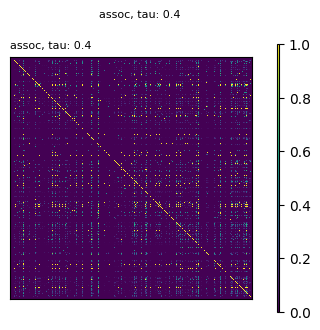

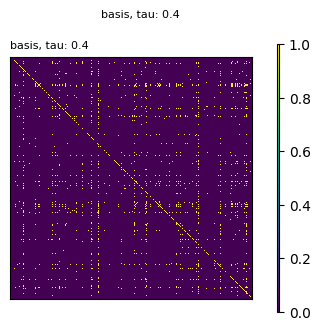

[I] k            : 5
[I] tau          : 0.5
[I] weights      : [0.8, 0.2]
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.


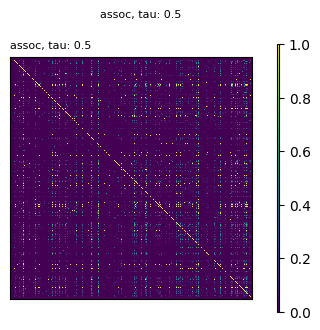

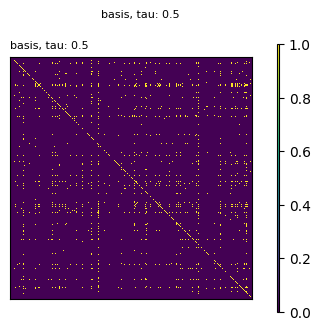

In [6]:
k = 5
tau_list = [0.10, 0.20, 0.30, 0.40, 0.50]
w = [0.8, 0.2]

for tau in tau_list:
    asso = Asso(k=k, tau=tau, w=w)
    asso._fit_prepare(X_train, display=True, scaling=0.5) # plot assoc and basis

In [19]:
# empty table
from utils import add_log

metrics = ['Recall', 'Precision', 'Accuracy', 'F1'] # ['recall_score', 'precision_score', 'accuracy_score', 'f1_score']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction_train = pd.DataFrame(columns=columns)
df_prediction_val = pd.DataFrame(columns=columns)
df_prediction_test = pd.DataFrame(columns=columns)

In [20]:
# prediction with ratio split

k = 5
tau = 0.2
w_list = [[0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1], [1.0, 0.0]]

for w in w_list:
    asso = Asso(k=k, tau=tau, w=w)
    asso.fit(X_train)

    results = asso.eval(X_train, metrics=metrics, task='prediction')
    add_log(df_prediction_train, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

    results = asso.eval(X_val, metrics=metrics, task='prediction')
    add_log(df_prediction_val, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

    results = asso.eval(X_test, metrics=metrics, task='prediction')
    add_log(df_prediction_test, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)
    
display(df_prediction_train)
display(df_prediction_val)
display(df_prediction_test)

[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.4, 0.6]
[W] Missing validation data.


100%|██████████| 5/5 [00:19<00:00,  3.97s/it]                         


[I] task         : prediction
[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.5, 0.5]
[W] Missing validation data.


100%|██████████| 5/5 [00:19<00:00,  3.97s/it]                         


[I] task         : prediction
[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.6, 0.4]
[W] Missing validation data.


100%|██████████| 5/5 [00:19<00:00,  3.98s/it]                         


[I] task         : prediction
[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.7, 0.3]
[W] Missing validation data.


100%|██████████| 5/5 [00:20<00:00,  4.09s/it]                         


[I] task         : prediction
[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.8, 0.2]
[W] Missing validation data.


100%|██████████| 5/5 [00:21<00:00,  4.23s/it]                         


[I] task         : prediction
[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.9, 0.1]
[W] Missing validation data.


100%|██████████| 5/5 [00:22<00:00,  4.41s/it]                         


[I] task         : prediction
[I] k            : 5
[I] tau          : 0.2
[I] weights      : [1.0, 0.0]
[W] Missing validation data.


100%|██████████| 5/5 [00:27<00:00,  5.56s/it]                         


[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precision,Accuracy,F1
0,2023-12-08 12:48:36.750732,5,0.2,0.4,0.6,0.105093,0.951362,0.549860,0.189278
1,2023-12-08 12:49:02.282918,5,0.2,0.5,0.5,0.125510,0.937400,0.558564,0.221380
2,2023-12-08 12:49:27.874820,5,0.2,0.6,0.4,0.232323,0.894127,0.602407,0.368816
3,2023-12-08 12:49:54.082278,5,0.2,0.7,0.3,0.371588,0.809836,0.642166,0.509428
4,2023-12-08 12:50:20.926475,5,0.2,0.8,0.2,0.505910,0.749682,0.668493,0.604132
5,2023-12-08 12:50:48.747924,5,0.2,0.9,0.1,0.688803,0.668823,0.673866,0.678666
6,2023-12-08 12:51:22.274778,5,0.2,1.0,0.0,0.947346,0.556917,0.596819,0.701464


,time,k,tau,p_pos,p_neg,Recall,Precision,Accuracy,F1
0,2023-12-08 12:48:37.567967,5,0.2,0.4,0.6,0.016744,0.642857,0.503721,0.032638
1,2023-12-08 12:49:03.084982,5,0.2,0.5,0.5,0.022326,0.615385,0.504186,0.043088
2,2023-12-08 12:49:28.736520,5,0.2,0.6,0.4,0.110698,0.739130,0.535814,0.192557
3,2023-12-08 12:49:54.909644,5,0.2,0.7,0.3,0.243721,0.725762,0.575814,0.364903
4,2023-12-08 12:50:21.743446,5,0.2,0.8,0.2,0.346047,0.650350,0.580000,0.451730
5,2023-12-08 12:50:49.575849,5,0.2,0.9,0.1,0.542326,0.602273,0.592093,0.570729
6,2023-12-08 12:51:23.094747,5,0.2,1.0,0.0,0.813023,0.518387,0.528837,0.633104


,time,k,tau,p_pos,p_neg,Recall,Precision,Accuracy,F1
0,2023-12-08 12:48:38.652392,5,0.2,0.4,0.6,0.014655,0.724138,0.504536,0.028728
1,2023-12-08 12:49:04.197670,5,0.2,0.5,0.5,0.025820,0.755102,0.508723,0.049933
2,2023-12-08 12:49:29.818765,5,0.2,0.6,0.4,0.114445,0.755760,0.538730,0.198788
3,2023-12-08 12:49:56.010650,5,0.2,0.7,0.3,0.241452,0.723849,0.574669,0.362114
4,2023-12-08 12:50:22.838931,5,0.2,0.8,0.2,0.369853,0.656753,0.588276,0.473214
5,2023-12-08 12:50:50.676921,5,0.2,0.9,0.1,0.535241,0.604413,0.592463,0.567728
6,2023-12-08 12:51:24.185272,5,0.2,1.0,0.0,0.795534,0.515604,0.524075,0.625686


In [29]:
# apply best
k, tau, w = 100, 0.2, [0.9, 0.1]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='prediction')

display(asso.df_validation)

[I] k            : 100
[I] tau          : 0.2
[I] weights      : [0.9, 0.1]
[I] task         : prediction


100%|██████████| 100/100 [09:20<00:00,  5.61s/it]                       


,time,k,tau,p_pos,p_neg,Recall,Precision,Accuracy,F1
0,2023-12-08 18:18:53.343393,1,0.2,0.9,0.1,0.429767,0.616822,0.581395,0.506579
1,2023-12-08 18:18:58.407260,2,0.2,0.9,0.1,0.476279,0.616125,0.589767,0.537251
2,2023-12-08 18:19:03.648868,3,0.2,0.9,0.1,0.520000,0.606291,0.591163,0.559840
3,2023-12-08 18:19:08.922892,4,0.2,0.9,0.1,0.529302,0.602116,0.589767,0.563366
4,2023-12-08 18:19:14.293228,5,0.2,0.9,0.1,0.542326,0.602273,0.592093,0.570729
...,...,...,...,...,...,...,...,...,...
95,2023-12-08 18:27:48.547695,96,0.2,0.9,0.1,0.608372,0.596715,0.598605,0.602487
96,2023-12-08 18:27:53.742301,97,0.2,0.9,0.1,0.608372,0.596715,0.598605,0.602487
97,2023-12-08 18:27:59.045259,98,0.2,0.9,0.1,0.609302,0.597083,0.599070,0.603131
98,2023-12-08 18:28:04.050280,99,0.2,0.9,0.1,0.609302,0.597083,0.599070,0.603131


<Axes: >

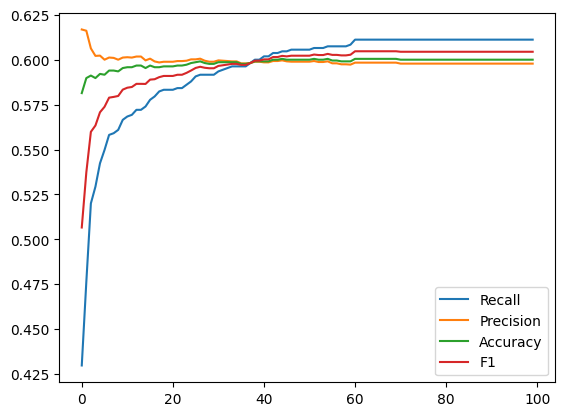

In [22]:
asso.df_validation[['Recall', 'Precision', 'Accuracy', 'F1']].plot()

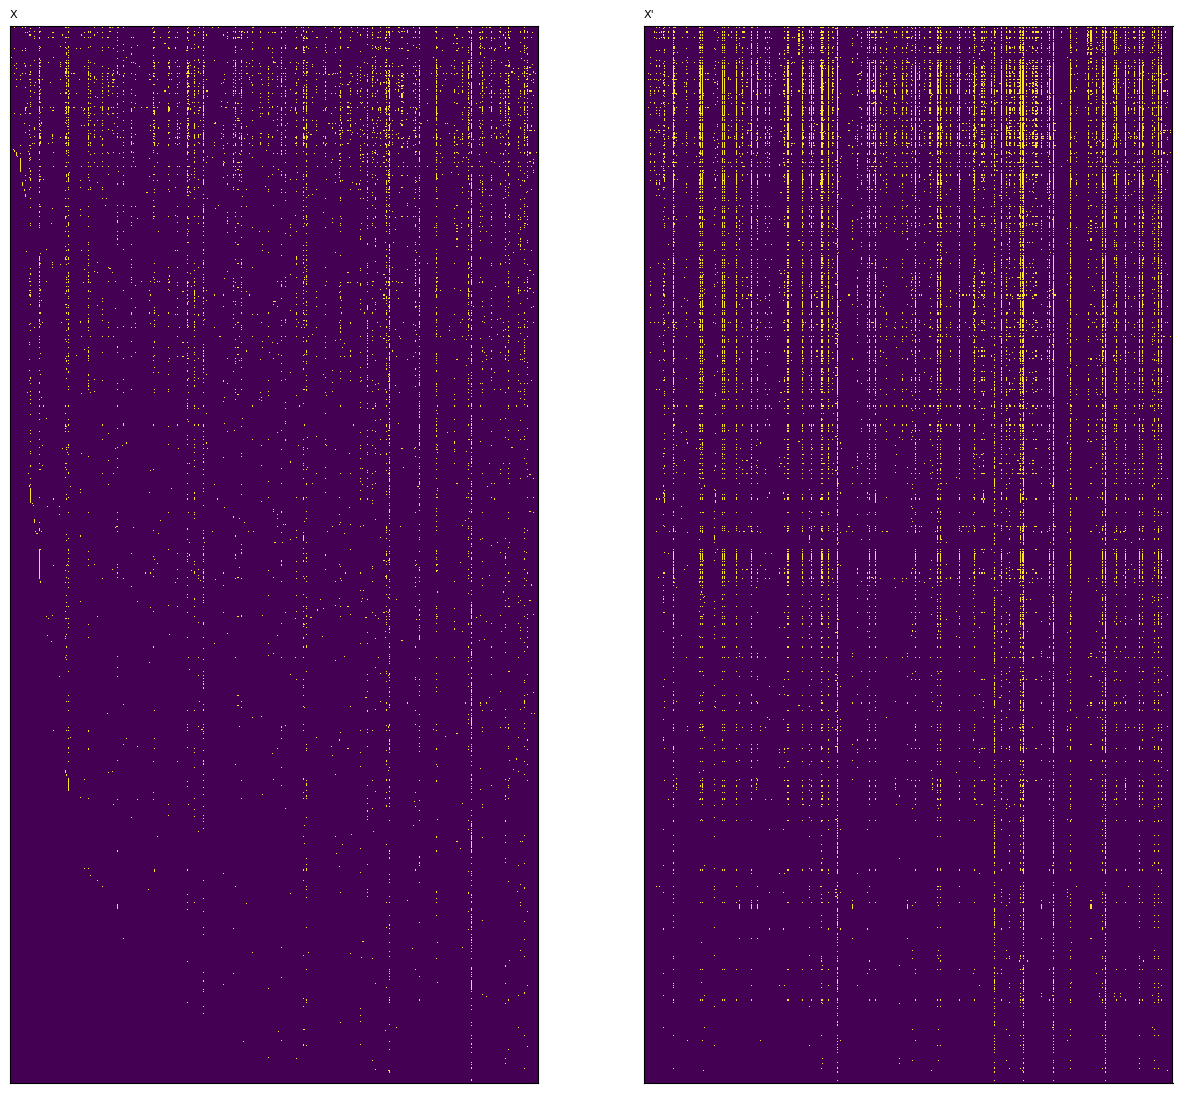

In [33]:
from utils import show_matrix, to_dense, matmul

# in reconstruction view
show_matrix(settings=[(to_dense(X), [0, 0], 'X'), (matmul(asso.U[:, :60], asso.V[:, :60].T, sparse=False, boolean=True), [0, 1], "X'")])

In [39]:
# check density of the last few patterns

print(asso.U[:, 99].sum(), asso.V[:, 99].sum())

1.0 10.0
